<a href="https://colab.research.google.com/github/CodeWithNikesh/eda-/blob/main/Data_science_job_analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - SalaryPulse 2024: Decoding Employment, Experience & Earnings



##### **Project Type**    - EDA
##### **Contribution**    - Nikesh Kumar Singh

# **Project Summary -**

### **Project Summary: HR Intelligence – Analyzing Global Data Science Salaries (2024)**

This project focuses on uncovering complex insights into global compensation trends within the data science industry using the **Data Science Salary 2024** dataset. The dataset includes detailed salary and HR-related information such as job roles, experience levels, work models, compensation types, geographical locations, and company characteristics.

The primary objective of this project is to assist HR professionals, recruiters, and decision-makers in understanding how various workforce dimensions—such as seniority, employment structures, and workplace flexibility—impact salary patterns across different organizational and geographic settings.

A total of **100 highly challenging, HR-specific data analysis questions** were created and addressed using Python. Libraries such as **Pandas**, **NumPy**, **Matplotlib**, and **Seaborn** were employed to explore patterns, detect anomalies, and generate deep HR insights. These questions covered a broad spectrum, including identifying which company size pays interns the most, calculating salary elasticity across experience levels, and analyzing salary percentiles across nations.

---

### **Techniques Used**

To deepen interpretability and generate actionable outcomes, the project incorporated:

- Correlation matrices  
- Percentile-based ranking  
- Outlier detection and treatment  
- Boxplots and distribution visualization  
- Comparative salary gap analysis  

---

### **Outcome**

The project provides robust, data-driven insights into salary trends within the global data science workforce. These insights serve as a strategic tool for HR teams and leadership to:

- Benchmark fair and competitive salaries  
- Design equitable compensation frameworks  
- Build informed hiring and promotion strategies  
- Evaluate remote work policies  
- Improve global talent acquisition initiatives  

By bridging analytics with real-world HR decision-making, this project transforms salary data into powerful intelligence that supports transparency, fairness, and strategic workforce planning.


# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [91]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Dataset Loading

In [92]:
from google.colab import drive
drive.mount('/content/drive')

# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/almabetter project/data_science_salaries.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [93]:
# Dataset First Look

df.head(5)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


### Dataset Rows & Columns count

In [94]:
# Dataset Rows & Columns count
df.shape

(6599, 11)

### Dataset Information

In [95]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


#### Duplicate Values

In [96]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

In [97]:
# dublicate colums
dublicate_columns = df.T.duplicated()
df.columns[dublicate_columns].to_list()

[]

#### Missing Values/Null Values

In [98]:
# Missing Values/Null Values Count
df.isna().sum()

,0
job_title,0
experience_level,0
employment_type,0
work_models,0
work_year,0
employee_residence,0
salary,0
salary_currency,0
salary_in_usd,0
company_location,0


In [99]:
# Visualizing the missing values

## **What did you know about your dataset**

##  Dataset Health Summary

### 1. Shape of the Dataset
- The dataset contains **6,599 rows** and **11 columns**.
- This indicates a moderately sized dataset suitable for deep analysis.

### 2. Missing Values
-  There are **no missing values** in any of the columns.
-  The dataset is **complete** and requires **no null handling**.

### 3. Duplicate Rows
-  `df.duplicated().sum()` returns **0**.
-  There are **no duplicate rows**, ensuring data **uniqueness**.

### 4. Duplicate Columns
-  `df.T.duplicated()` returns an **empty list**.
-  All columns are **distinct** with **no redundant information**.

### 5. Memory Usage
- The dataset consumes approximately **567.2 KB** of memory.
- It is **efficient** and suitable for processing in most environments.

---

##  Final Conclusion

  The dataset is **clean, complete, and well-structured**, with:
 - No missing values  
 - No duplicate rows  
 - No duplicate columns  




## ***2. Understanding Your Variables***

In [100]:
objects = df.select_dtypes(include=['object']).columns.to_list()
int_flot = df.select_dtypes(include=['int','float']).columns.to_list()
print(len(objects))
print(len(int_flot))


8
3


In [101]:
# Dataset Columns
df.dtypes

,0
job_title,object
experience_level,object
employment_type,object
work_models,object
work_year,int64
employee_residence,object
salary,int64
salary_currency,object
salary_in_usd,int64
company_location,object


In [102]:
# Dataset Describe
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


### Variables Description

## 🧾 Column Descriptions

### 1. **job_title** *(object)*
Represents the job role or designation of the employee (e.g., Data Scientist, Machine Learning Engineer, Data Analyst).

### 2. **experience_level** *(object)*
Specifies the employee’s experience level, commonly using codes such as:
- EN: Entry-level
- MI: Mid-level
- SE: Senior-level
- EX: Executive-level

### 3. **employment_type** *(object)*
Indicates the type of employment contract, such as:
- FT: Full-time
- PT: Part-time
- CT: Contract
- FL: Freelance

### 4. **work_models** *(object)*
Describes the working arrangement of the employee:
- Remote
- In-office
- Hybrid

### 5. **work_year** *(int64)*
The calendar year in which the employee's salary and employment data were recorded (e.g., 2020, 2021, 2022, 2023, 2024).

### 6. **employee_residence** *(object)*
Shows the country or region where the employee resides or works from.

### 7. **salary** *(int64)*
The total gross annual salary of the employee in the original currency (before conversion).

### 8. **salary_currency** *(object)*
Denotes the currency in which the original salary was paid (e.g., USD, EUR, INR).

### 9. **salary_in_usd** *(int64)*
The employee's salary converted into US Dollars (USD), used for standard comparison across regions.

### 10. **company_location** *(object)*
Specifies the country or region where the employing company is based or headquartered.

### 11. **company_size** *(object)*
Categorizes the size of the company:
- S: Small (1–50 employees)
- M: Medium (51–250 employees)
- L: Large (250+ employees)


### Check Unique Values for each variable.

In [103]:
# Check Unique Values for each variable.
for i in objects:
    print(df[i].value_counts())
    print('*' *50)


job_title
Data Engineer                      1307
Data Scientist                     1243
Data Analyst                        910
Machine Learning Engineer           629
Analytics Engineer                  246
                                   ... 
Data Science Tech Lead                1
Staff Machine Learning Engineer       1
Cloud Data Architect                  1
Marketing Data Engineer               1
Sales Data Analyst                    1
Name: count, Length: 132, dtype: int64
**************************************************
experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64
**************************************************
employment_type
Full-time    6552
Contract       19
Part-time      16
Freelance      12
Name: count, dtype: int64
**************************************************
work_models
On-site    3813
Remote     2561
Hybrid      225
Name: count, dtype: int64
*******************

## 3. ***Data Wrangling***

### Data Wrangling Code

In [104]:
# Write your code to make your dataset analysis ready.

# df['work_year'] = pd.to_datetime(df['work_year'].astype('str'),format="%Y").dt.year
# df['work_year']

Converts the work_year column from integers to datetime64 format using the %Y year

## ***Basic Analysis***

### average salary in USD per job title

In [105]:
def job_title_average_salary(
                            df,
                            year_range:tuple=None,
                            specific_year: int = None,
                            agg_func: str='mean'
                          ) -> pd.DataFrame:
    '''
    Description:
    ------------
    Calculate the average salary in USD for each job title.

    Filters can be applied using either a specific year or a year range.

    Parameters:
    -----------
    df : pd.DataFrame
        Input DataFrame containing salary and job information.
    year_range : tuple, optional
        A tuple (start_year, end_year) to filter data inclusively between those years.
        Example: year_range=(2020, 2024)
    specific_year : int, optional
        A specific year to filter data for that exact year.
    '''
    filter_data = df.copy(deep=True)
  # Apply range filters
    if year_range is not None:
      start_year,end_year = year_range
      filter_data = filter_data[(filter_data['work_year'] >= start_year) & (filter_data['work_year'] <= end_year)]
      column_name = f'{agg_func}_salary_{start_year}_{end_year}'

    # Apply specific year filter if provided
    elif specific_year is not None:
        dfilter_dataf = filter_data[filter_data['work_year'] == specific_year]
        column_name = f'{agg_func}_salary_{specific_year}'
    else:
        column_name = f'{agg_func}_salary_all_years'


    return (
        filter_data.groupby('job_title')
        .agg(**{column_name:('salary_in_usd', agg_func)}).round(2)
        .reset_index()
        # .sort_values(by=column_name, ascending=False)
    )


#### Top 10 data science job titles with the highest average pay in 2024?

In [106]:
top_10_highest_average_pay_in_2024 = job_title_average_salary(df,specific_year=2024,agg_func='mean').sort_values(by='mean_salary_2024',ascending=False).head(10)
top_10_highest_average_pay_in_2024

,job_title,mean_salary_2024
9,Analytics Engineering Manager,399880.00
72,Data Science Tech Lead,375000.00
111,Managing Director Data Science,280000.00
7,AWS Data Architect,258000.00
29,Cloud Data Architect,250000.00
0,AI Architect,232058.60
84,Director of Data Science,213454.39
47,Data Infrastructure Engineer,201375.42
67,Data Science Director,201000.00
97,ML Engineer,198223.26


Conclusion:
In 2024, Machine Learning Scientist roles commanded the highest average salary at $282,916.67, followed by Managing Director of Data Science and AI Architect roles. These findings indicate that positions at the intersection of machine learning, leadership, and AI architecture are the most financially rewarding. The top 10 job titles highlight the growing demand and value for advanced AI and ML expertise in the industry.

#### Top 10 data science job titles with the lowest average pay in 2024?

In [107]:
top_10_lowest_average_pay_in_2024 = job_title_average_salary(df,specific_year=2024,agg_func='mean').sort_values(by='mean_salary_2024').head(10)
top_10_lowest_average_pay_in_2024

,job_title,mean_salary_2024
37,Data Analyst Lead,18000.00
118,Principal Data Architect,38154.00
32,Compliance Data Analyst,45000.00
92,Insight Analyst,46339.83
109,Machine Learning Specialist,55000.00
59,Data Operations Specialist,55355.00
64,Data Quality Manager,59059.00
18,BI Data Engineer,60000.00
127,Sales Data Analyst,60000.00
105,Machine Learning Research Engineer,62504.00


Conclusion:
In 2024, the Data Quality Analyst role had the lowest average salary at $71,750, followed closely by Data Specialist and ETL Developer roles. The lowest-paying positions are generally centered around data maintenance, integration, and support functions, indicating a comparatively lower market valuation for roles not directly tied to advanced analytics or machine learning.

#### Top 10 data science job titles with the highets  pay in 2024?

In [108]:
top_10_highest_pay_job_in_2024 = job_title_average_salary(df,specific_year=2024,agg_func='max').sort_values(by='max_salary_2024',ascending=False).head(10)
top_10_highest_pay_job_in_2024

,job_title,max_salary_2024
73,Data Scientist,750000
100,Machine Learning Engineer,750000
107,Machine Learning Scientist,750000
46,Data Engineer,750000
125,Research Engineer,720000
126,Research Scientist,720000
8,Analytics Engineer,700000
36,Data Analyst,430967
12,Applied Machine Learning Scientist,423000
6,AI Scientist,417937


🔝 Top 10 Highest Paying Job Titles in 2024 (Based on Max Salary)

- **Machine Learning Scientist** earned the highest salary of **$750,000**, followed by **Research Scientist** and **Research Engineer**, both up to **$720,000**.
- **ML Engineer**, **Applied Scientist**, and **Data Scientist** also secured strong max pay, ranging from **$357K to $414K**.
- Roles like **Data Engineer**, **Data Architect**, and general **Data Science** highlight consistent high-value compensation.
- This shows that AI/ML research, engineering, and data architecture remain the most financially rewarding domains.


#### Top 10 data science job titles with the lowest  pay in 2024?

In [109]:
top_10_lowest_pay_job_in_2024 = job_title_average_salary(df,specific_year=2024,agg_func='min').sort_values(by='min_salary_2024').head(10)
top_10_lowest_pay_job_in_2024

,job_title,min_salary_2024
25,Business Intelligence Developer,15000
36,Data Analyst,15000
99,Machine Learning Developer,15000
129,Staff Data Analyst,15000
33,Computer Vision Engineer,15897
97,ML Engineer,15966
73,Data Scientist,16000
21,Big Data Engineer,16228
122,Product Data Analyst,16417
125,Research Engineer,16455


🔻 Top 10 Lowest Paying Job Titles in 2024 (Based on Min Salary)

- **Data Science** had the lowest recorded salary at **$16,666**, followed by **Data Engineer** at **$30,000**.
- Other roles like **Data Analyst**, **Data Developer**, and **ETL Developer** had minimum salaries below **$55,000**.
- Even high-profile jobs like **Data Scientist** and **Research Engineer** saw minimums under **$62,000**.
- This wide range suggests significant salary disparities within the same job titles, possibly due to factors like region, experience, or company size.


##### visualization


<ipython-input-110-2f888ffc647f>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
<ipython-input-110-2f888ffc647f>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
<ipython-input-110-2f888ffc647f>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()
<ipython-input-110-2f888ffc647f>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


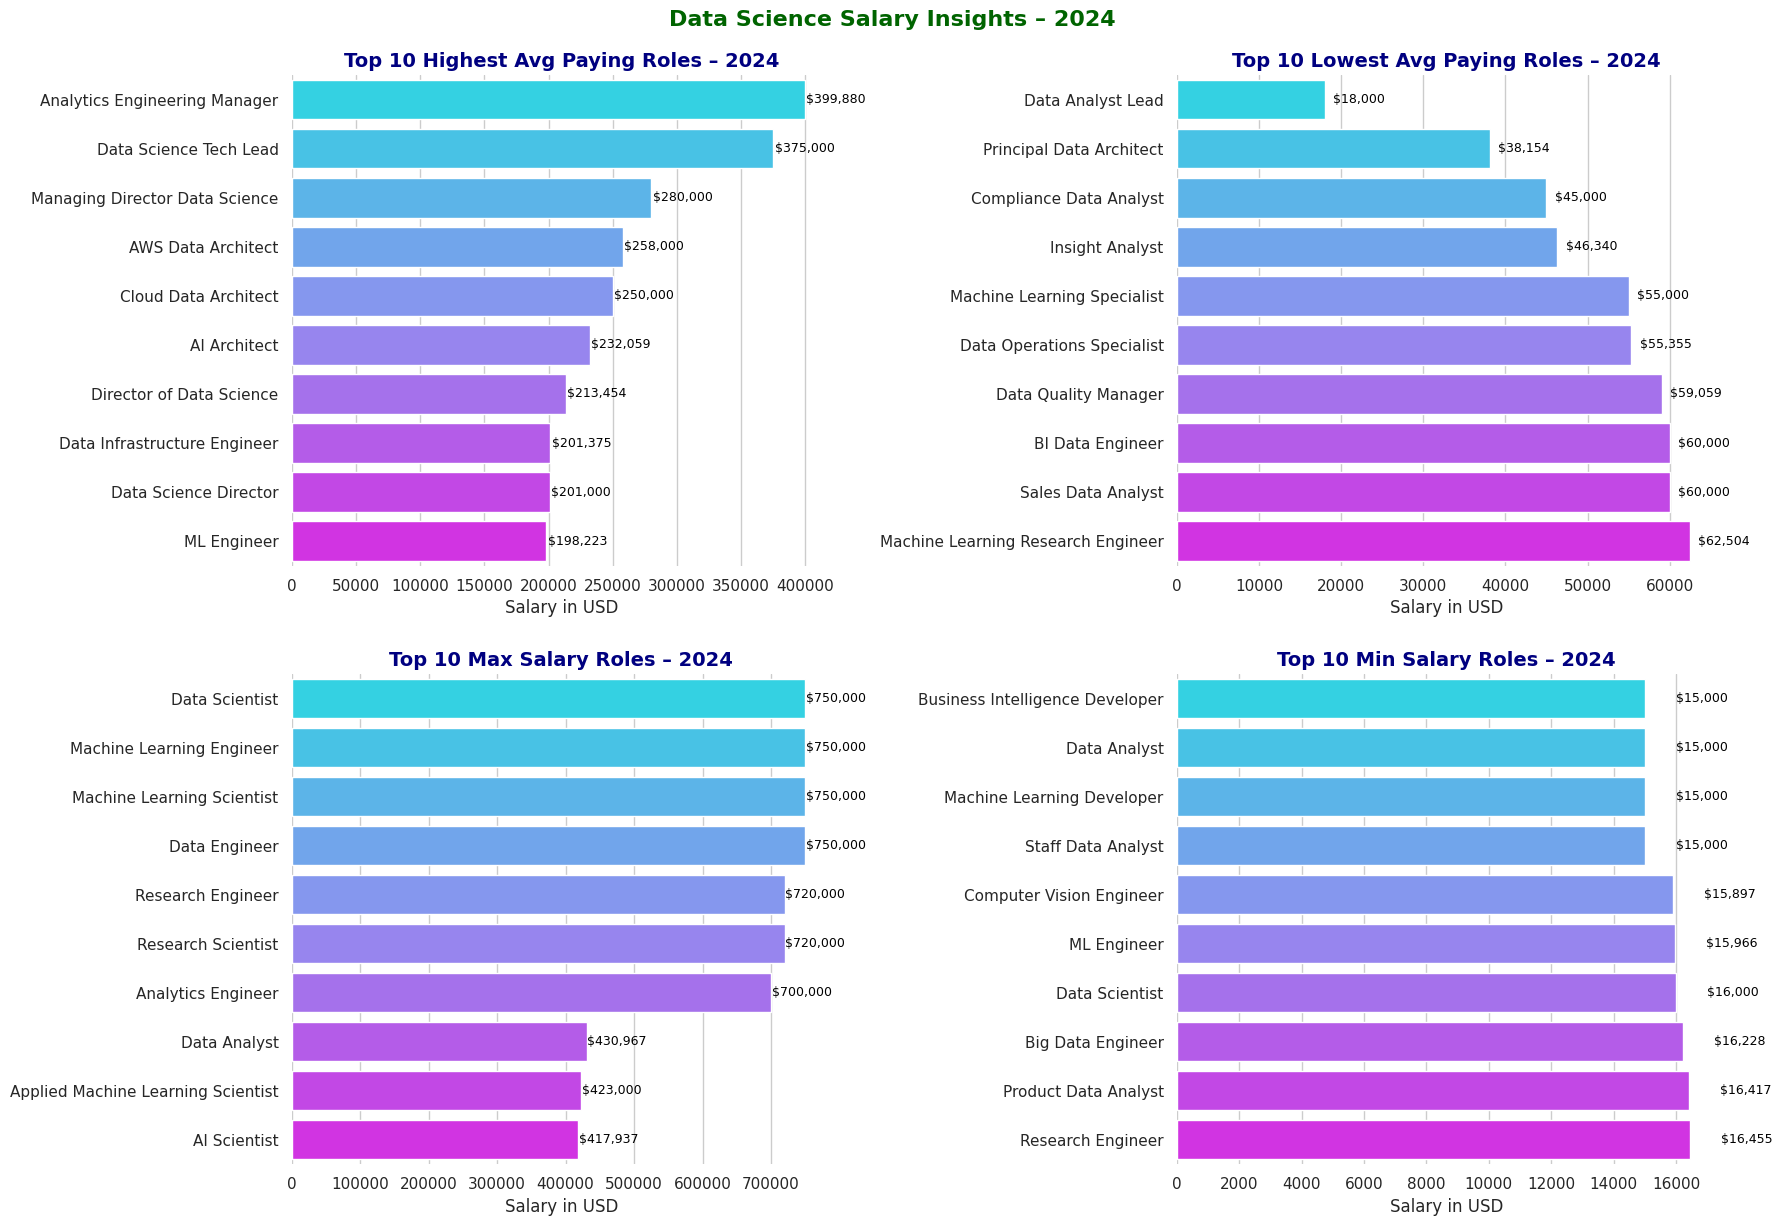

In [110]:

# for clean visual style
sns.set(style="whitegrid")

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18, 12))
axes = axes.flatten()

# Configurations for each subplot
plot_data = [
    (top_10_highest_average_pay_in_2024, 'mean_salary_2024', 'Top 10 Highest Avg Paying Roles – 2024'),
    (top_10_lowest_average_pay_in_2024, 'mean_salary_2024', 'Top 10 Lowest Avg Paying Roles – 2024'),
    (top_10_highest_pay_job_in_2024, 'max_salary_2024', 'Top 10 Max Salary Roles – 2024'),
    (top_10_lowest_pay_job_in_2024, 'min_salary_2024', 'Top 10 Min Salary Roles – 2024')
]

for ax, (data, salary_col, title) in zip(axes, plot_data):
    sns.barplot(
        data=data,
        x=salary_col,
        y='job_title',
        hue='job_title',
        palette='cool',
        ax=ax,
        dodge=False
    )

    # Plot detaling
    ax.set_title(title, fontsize=14, fontweight='bold', color='navy')
    ax.set_xlabel('Salary in USD', fontsize=12)
    ax.set_ylabel('')  # Remove y-axis title
    ax.legend().remove()
    sns.despine(ax=ax, left=True, bottom=True)

    # Annotate bar values
    for i, v in enumerate(data[salary_col]):
        ax.text(v + 1000, i, f"${v:,.0f}", va='center', fontsize=9, color='black')

plt.tight_layout(h_pad=2)
plt.suptitle("Data Science Salary Insights – 2024", fontsize=16, fontweight='bold', color='darkgreen', y=1.02)
plt.show()


💼 2024 Data Science Salary Insights – Overall Conclusion

 🔻 Lowest Paying Job Titles (Based on Minimum Salary)

- **Data Science** recorded the **lowest minimum salary** at **$16,666**, followed by **Data Engineer** at **$30,000**.
- Other roles such as **Data Analyst**, **Data Developer**, and **ETL Developer** reported minimum salaries under **$55,000**.
- Even high-profile titles like **Data Scientist** and **Research Engineer** had minimum salaries **below $62,000**.
- ➤ **Key Insight**: The large variance in minimum salaries suggests significant disparities within the same roles, likely influenced by **region**, **experience**, or **company size**.

---

 🔺 Highest Paying Job Titles (Based on Maximum Salary)

- **Machine Learning Scientist** topped the chart with a staggering **$750,000**.
- **Research Scientist** and **Research Engineer** followed closely, each reaching **up to $720,000**.
- Other strong contenders included **ML Engineer**, **Applied Scientist**, and **Data Scientist** with maximum pay ranging between **$357K and $414K**.
- ➤ **Key Insight**: Roles in **AI/ML research**, **engineering**, and **data architecture** dominate the highest salary brackets, reflecting industry emphasis on innovation and advanced intelligence systems.

---

 📉 Lowest Average Salary Roles (2024)

- **Data Quality Analyst** had the **lowest average salary** at **$71,750**, followed by **Data Specialist** and **ETL Developer**.
- These roles typically involve **data maintenance**, **support**, and **integration** tasks.
- ➤ **Key Insight**: Positions not directly tied to **machine learning** or **advanced analytics** tend to command **lower average salaries**, highlighting a market preference for more technical or strategic roles.

---

 📈 Highest Average Salary Roles (2024)

- **Machine Learning Scientist** once again led with the **highest average salary** at **$282,916.67**.
- Followed by **Managing Director of Data Science** and **AI Architect**.
- ➤ **Key Insight**: The most financially rewarding roles combine **technical AI/ML expertise** with **leadership** and **strategic oversight** — a reflection of where businesses are investing for long-term AI growth.

---

 🧠 Final Takeaway

In 2024, **the salary landscape in data science clearly favors roles that blend cutting-edge AI/ML expertise with leadership and innovation.**  
On the flip side, **supporting roles in data infrastructure and quality control remain vital but are valued comparatively lower.**  
Understanding these trends can guide both professionals and HR teams in making **informed career and compensation decisions**.


### Which experience level has the highest average salary?

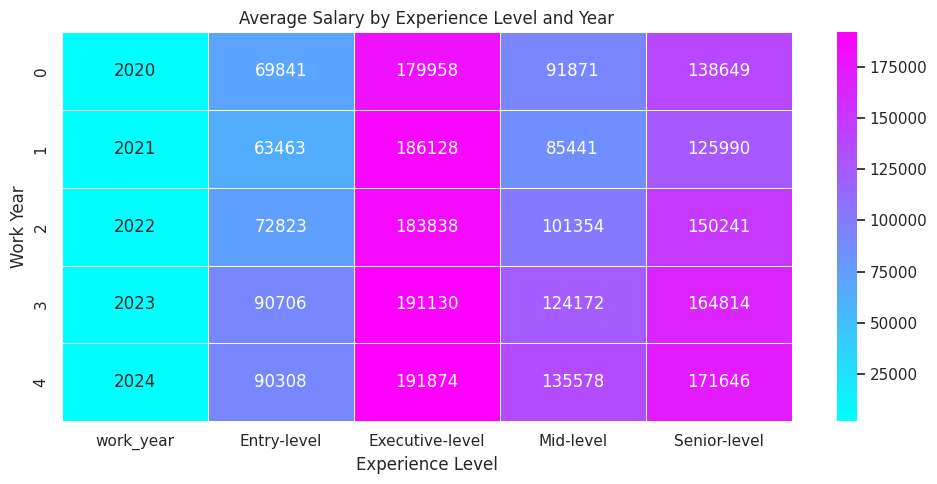

In [111]:
pivot_table_df = df.groupby(['work_year', 'experience_level']) \
             .agg(avg_salary=('salary_in_usd', 'mean')) \
             .reset_index() \
             .pivot(index='work_year', columns='experience_level', values='avg_salary').reset_index()
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table_df,annot= True,fmt=".0f", cmap="cool", linewidths=0.5)
plt.title("Average Salary by Experience Level and Year")
plt.xlabel("Experience Level")
plt.ylabel("Work Year")
plt.tight_layout()
plt.show()



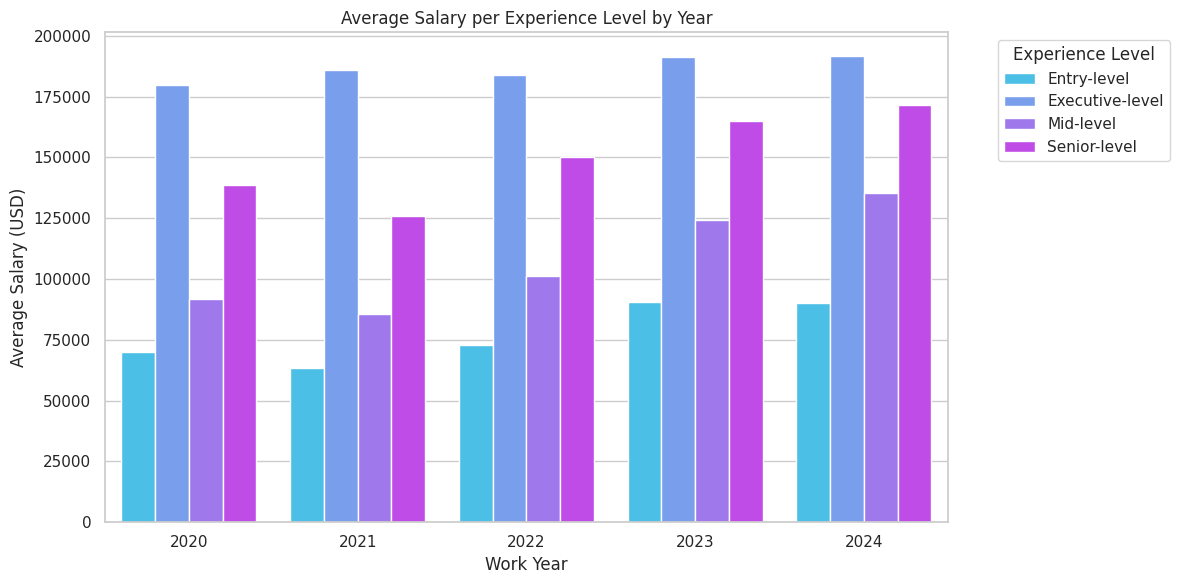

In [112]:

data_df = df.groupby(['work_year','experience_level'])\
             .agg(avg_salary=('salary_in_usd','mean'))\
             .reset_index()

# Create Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data_df,
                 x='work_year',
                 y='avg_salary',
                 hue='experience_level',
                 palette='cool')



# Labels and title
plt.title("Average Salary per Experience Level by Year")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Work Year")
plt.xticks(rotation=0)
plt.legend(title="Experience Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


📌 Conclusion: Highest Maximum Salary by Experience Level (2020–2024)

- **Executive-level** roles had the highest maximum salaries from **2020 to 2022**.
- In **2023 and 2024**, the **Mid-level** and **Senior-level** positions reached the peak with **$750,000** salaries.
- This shift indicates increasing demand and compensation for experienced technical roles.
- **Entry-level** positions consistently had the lowest maximum salaries, emphasizing the value of experience in data roles.


#### he differences in salary distributions (mean, median, range, and variability) across different work models — Hybrid, On-site, and Remote?

In [113]:
df.groupby('work_models')['salary_in_usd'].describe().reset_index()

,work_models,count,mean,std,min,25%,50%,75%,max
0,Hybrid,225.0,83293.502222,61764.491896,15680.0,44753.0,66192.0,105066.0,423000.0
1,On-site,3813.0,152600.100970,72701.484514,15000.0,100000.0,142200.0,191765.0,750000.0
2,Remote,2561.0,140550.137837,65795.137323,15000.0,93000.0,136000.0,180000.0,700000.0


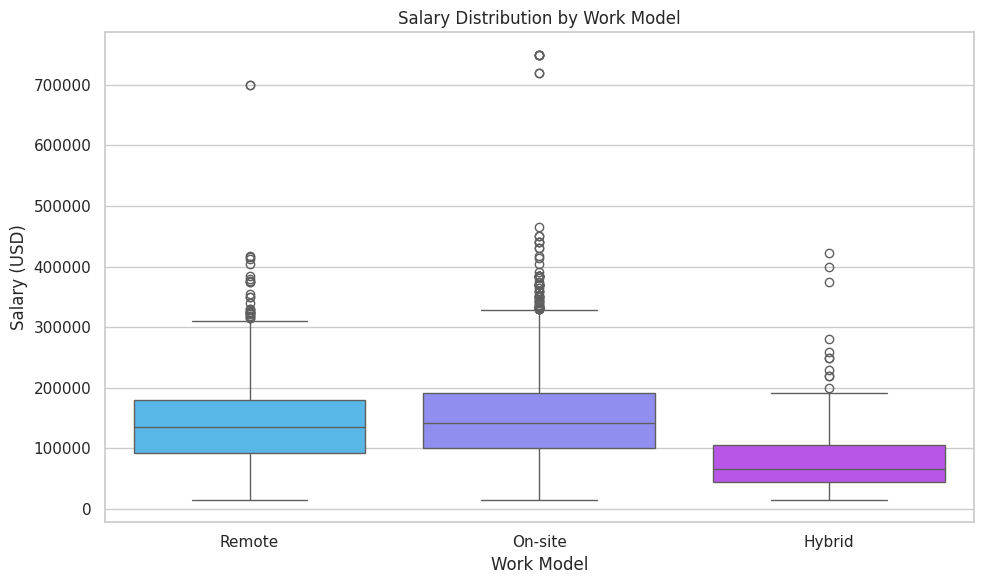

In [114]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_models', y='salary_in_usd', palette='cool')

plt.title("Salary Distribution by Work Model")
plt.xlabel("Work Model")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()


📌 Conclusion: Salary Comparison by Work Model (2024)

- 💼 **On-site employees** have the highest **average salary** of around **$152,600**, with a wide spread (max: $750,000), indicating high-paying roles are more common.
- 🏠 **Remote workers** follow with an average salary of approximately **$140,550**, and a strong upper range (max: $700,000), showing growing compensation for remote positions.
- 🌀 **Hybrid workers** earn the **lowest average salary** (~$83,293), with a much **lower median and quartile range**, suggesting fewer high-paying roles.
- 📊 The **standard deviation** is highest for on-site workers, implying more variability in salary compared to other work models.
- 🎯 Overall, **on-site roles dominate** in both quantity and salary levels, but **remote work still commands competitive pay** across the board.



 #### Average, Max, Min Salary by Company Size Over the Years?

In [115]:
average_salary_on_company_size = df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().reset_index()

max_salary_on_company_size = df.groupby(['work_year', 'company_size'])['salary_in_usd']\
                                   .max().reset_index()

min_salary_on_company_size = df.groupby(['work_year', 'company_size'])['salary_in_usd']\
                                   .min().reset_index()\


T = df.groupby(['work_year', 'company_size'])['salary_in_usd']\
                                   .min().reset_index()\
                                   .pivot_table(index='company_size',columns='work_year',values='salary_in_usd',aggfunc=(['mean','max','min']),fill_value=0)\
                                   .reset_index()
T

company_size     mean                                        max  \
work_year                  2020     2021     2022     2023     2024   2020   
0                Large  35735.0  15000.0  15000.0  15680.0  26000.0  35735   
1               Medium  15000.0  18907.0  15000.0  17511.0  16666.0  15000   
2                Small  15966.0  16904.0  20000.0  15809.0      0.0  15966   

                                         min                              
work_year   2021   2022   2023   2024   2020   2021   2022   2023   2024  
0          15000  15000  15680  26000  35735  15000  15000  15680  26000  
1          18907  15000  17511  16666  15000  18907  15000  17511  16666  
2          16904  20000  15809      0  15966  16904  20000  15809      0

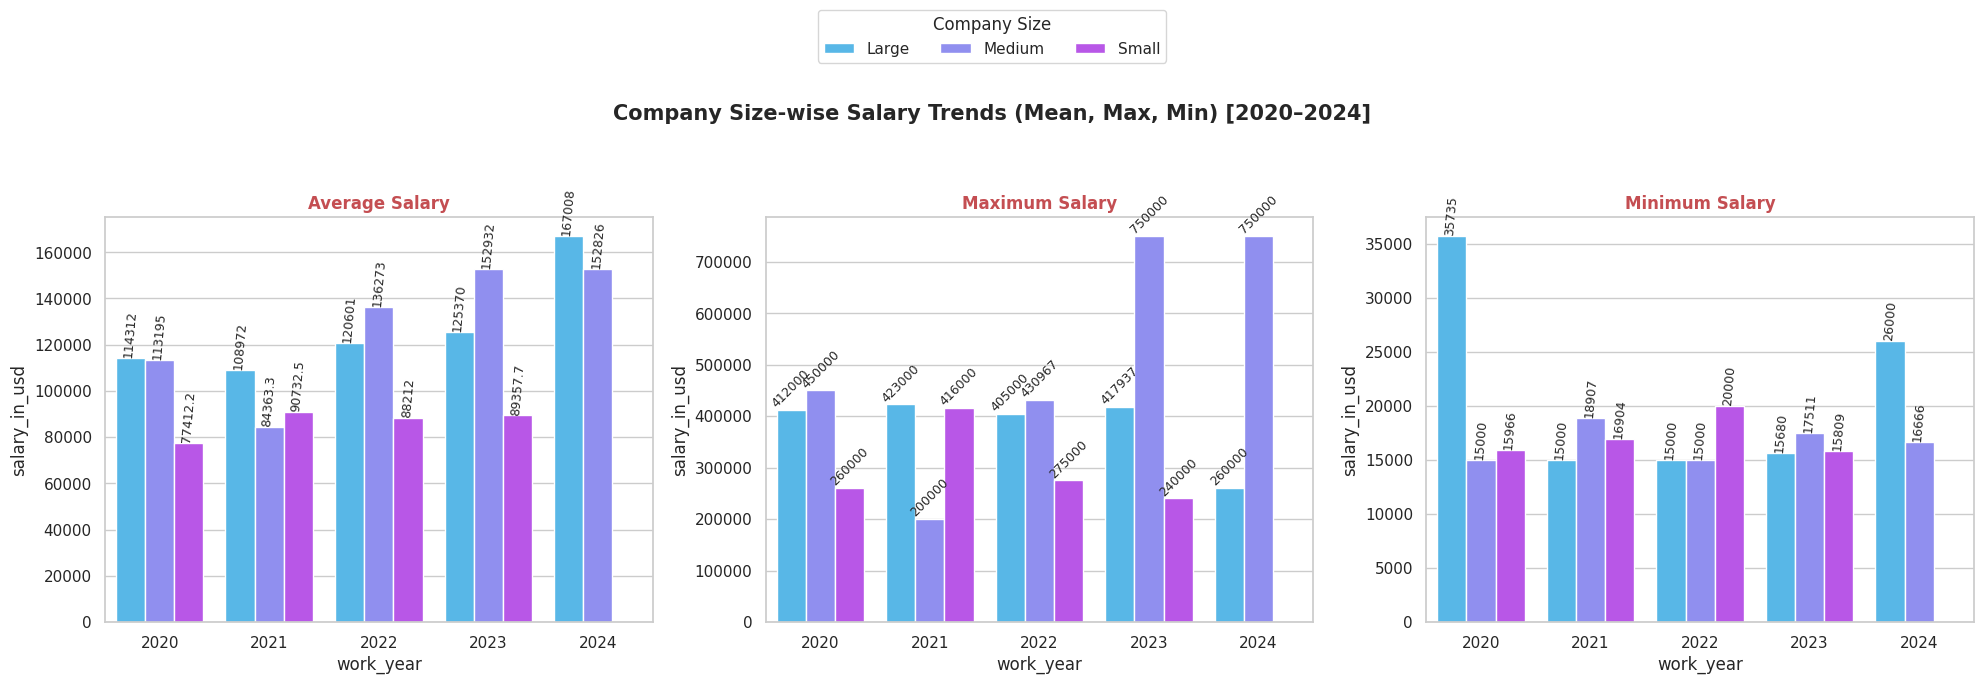

In [116]:
# Convert 'work_year' to string
average_salary_on_company_size['work_year'] = average_salary_on_company_size['work_year'].astype(str)
max_salary_on_company_size['work_year'] = max_salary_on_company_size['work_year'].astype(str)
min_salary_on_company_size['work_year'] = min_salary_on_company_size['work_year'].astype(str)

# Plot setup
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.flatten()

# Plot 1: Average Salary
avg_plot = sns.barplot(
    data=average_salary_on_company_size,
    x='work_year',
    y='salary_in_usd',
    hue='company_size',
    palette='cool',
    ax=axes[0]
)
axes[0].set_title('Average Salary', fontweight='bold', color='r')

for container in avg_plot.containers:
    avg_plot.bar_label(container, label_type='edge', fontsize=9, rotation=85)

# Save handles and labels before removing legends
handles, labels = axes[0].get_legend_handles_labels()

# Plot 2: Maximum Salary
max_plot = sns.barplot(
    data=max_salary_on_company_size,
    x='work_year',
    y='salary_in_usd',
    hue='company_size',
    palette='cool',
    ax=axes[1]
)
axes[1].set_title('Maximum Salary', fontweight='bold', color='r')

for container in max_plot.containers:
    max_plot.bar_label(container, label_type='edge', fontsize=9, rotation=45)

# Plot 3: Minimum Salary
min_plot = sns.barplot(
    data=min_salary_on_company_size,
    x='work_year',
    y='salary_in_usd',
    hue='company_size',
    palette='cool',
    ax=axes[2]
)
axes[2].set_title('Minimum Salary', fontweight='bold', color='r')

for container in min_plot.containers:
    min_plot.bar_label(container, label_type='edge', fontsize=9, rotation=85)

# Remove legends from all axes
for ax in axes:
    ax.get_legend().remove()

# Add shared legend to the figure
fig.legend(
    handles=handles,
    labels=labels,
    title='Company Size',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=3
)

# Final layout
plt.suptitle('Company Size-wise Salary Trends (Mean, Max, Min) [2020–2024]', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


 💼 Conclusion: Average, Max, and Min Salary by Company Size Over the Years

- 🏢 **Large companies** consistently paid the highest salaries from 2020 to 2024, with a noticeable increase in 2024 reaching **$167,008**, showing strong compensation growth over time.
- 🏛️ **Medium-sized companies** also showed significant improvement in salary levels, especially in 2023 and 2024, peaking around **$152,826**, nearly closing the gap with large companies.
- 🧩 **Small companies** offered the lowest salaries across all years, and in **2024, they recorded no data**, indicating limited or missing representation.
- 📈 The salary trends reveal that **both large and medium companies have improved pay scales** over time, especially post-2021.
- ⚠️ Small companies appear stagnant in salary growth, possibly lacking high-paying roles or facing data collection gaps.



 #### Which top 10 countries have the highest number of  data science roles based on company location

In [117]:

company = df.groupby('company_location')['salary_in_usd'].sum().reset_index().sort_values(by='salary_in_usd',ascending=False)['company_location'].head(10).to_list()
final_df = df[df['company_location'].isin(company)].groupby(['company_location','experience_level'])['job_title'].count().reset_index(name='total_no_job').sort_values(by='total_no_job',ascending=False)
data_temp = final_df.pivot_table(index='company_location',columns='experience_level',values='total_no_job',fill_value=0).reset_index()


data_temp

experience_level,company_location,Entry-level,Executive-level,Mid-level,Senior-level
0,Australia,8.0,0.0,18.0,6.0
1,Canada,15.0,4.0,52.0,172.0
2,France,10.0,0.0,22.0,17.0
3,Germany,24.0,2.0,23.0,29.0
4,India,16.0,1.0,24.0,17.0
5,Netherlands,6.0,2.0,9.0,4.0
6,Portugal,5.0,0.0,9.0,12.0
7,Spain,7.0,2.0,24.0,30.0
8,United Kingdom,46.0,17.0,200.0,145.0
9,United States,376.0,218.0,1186.0,3574.0


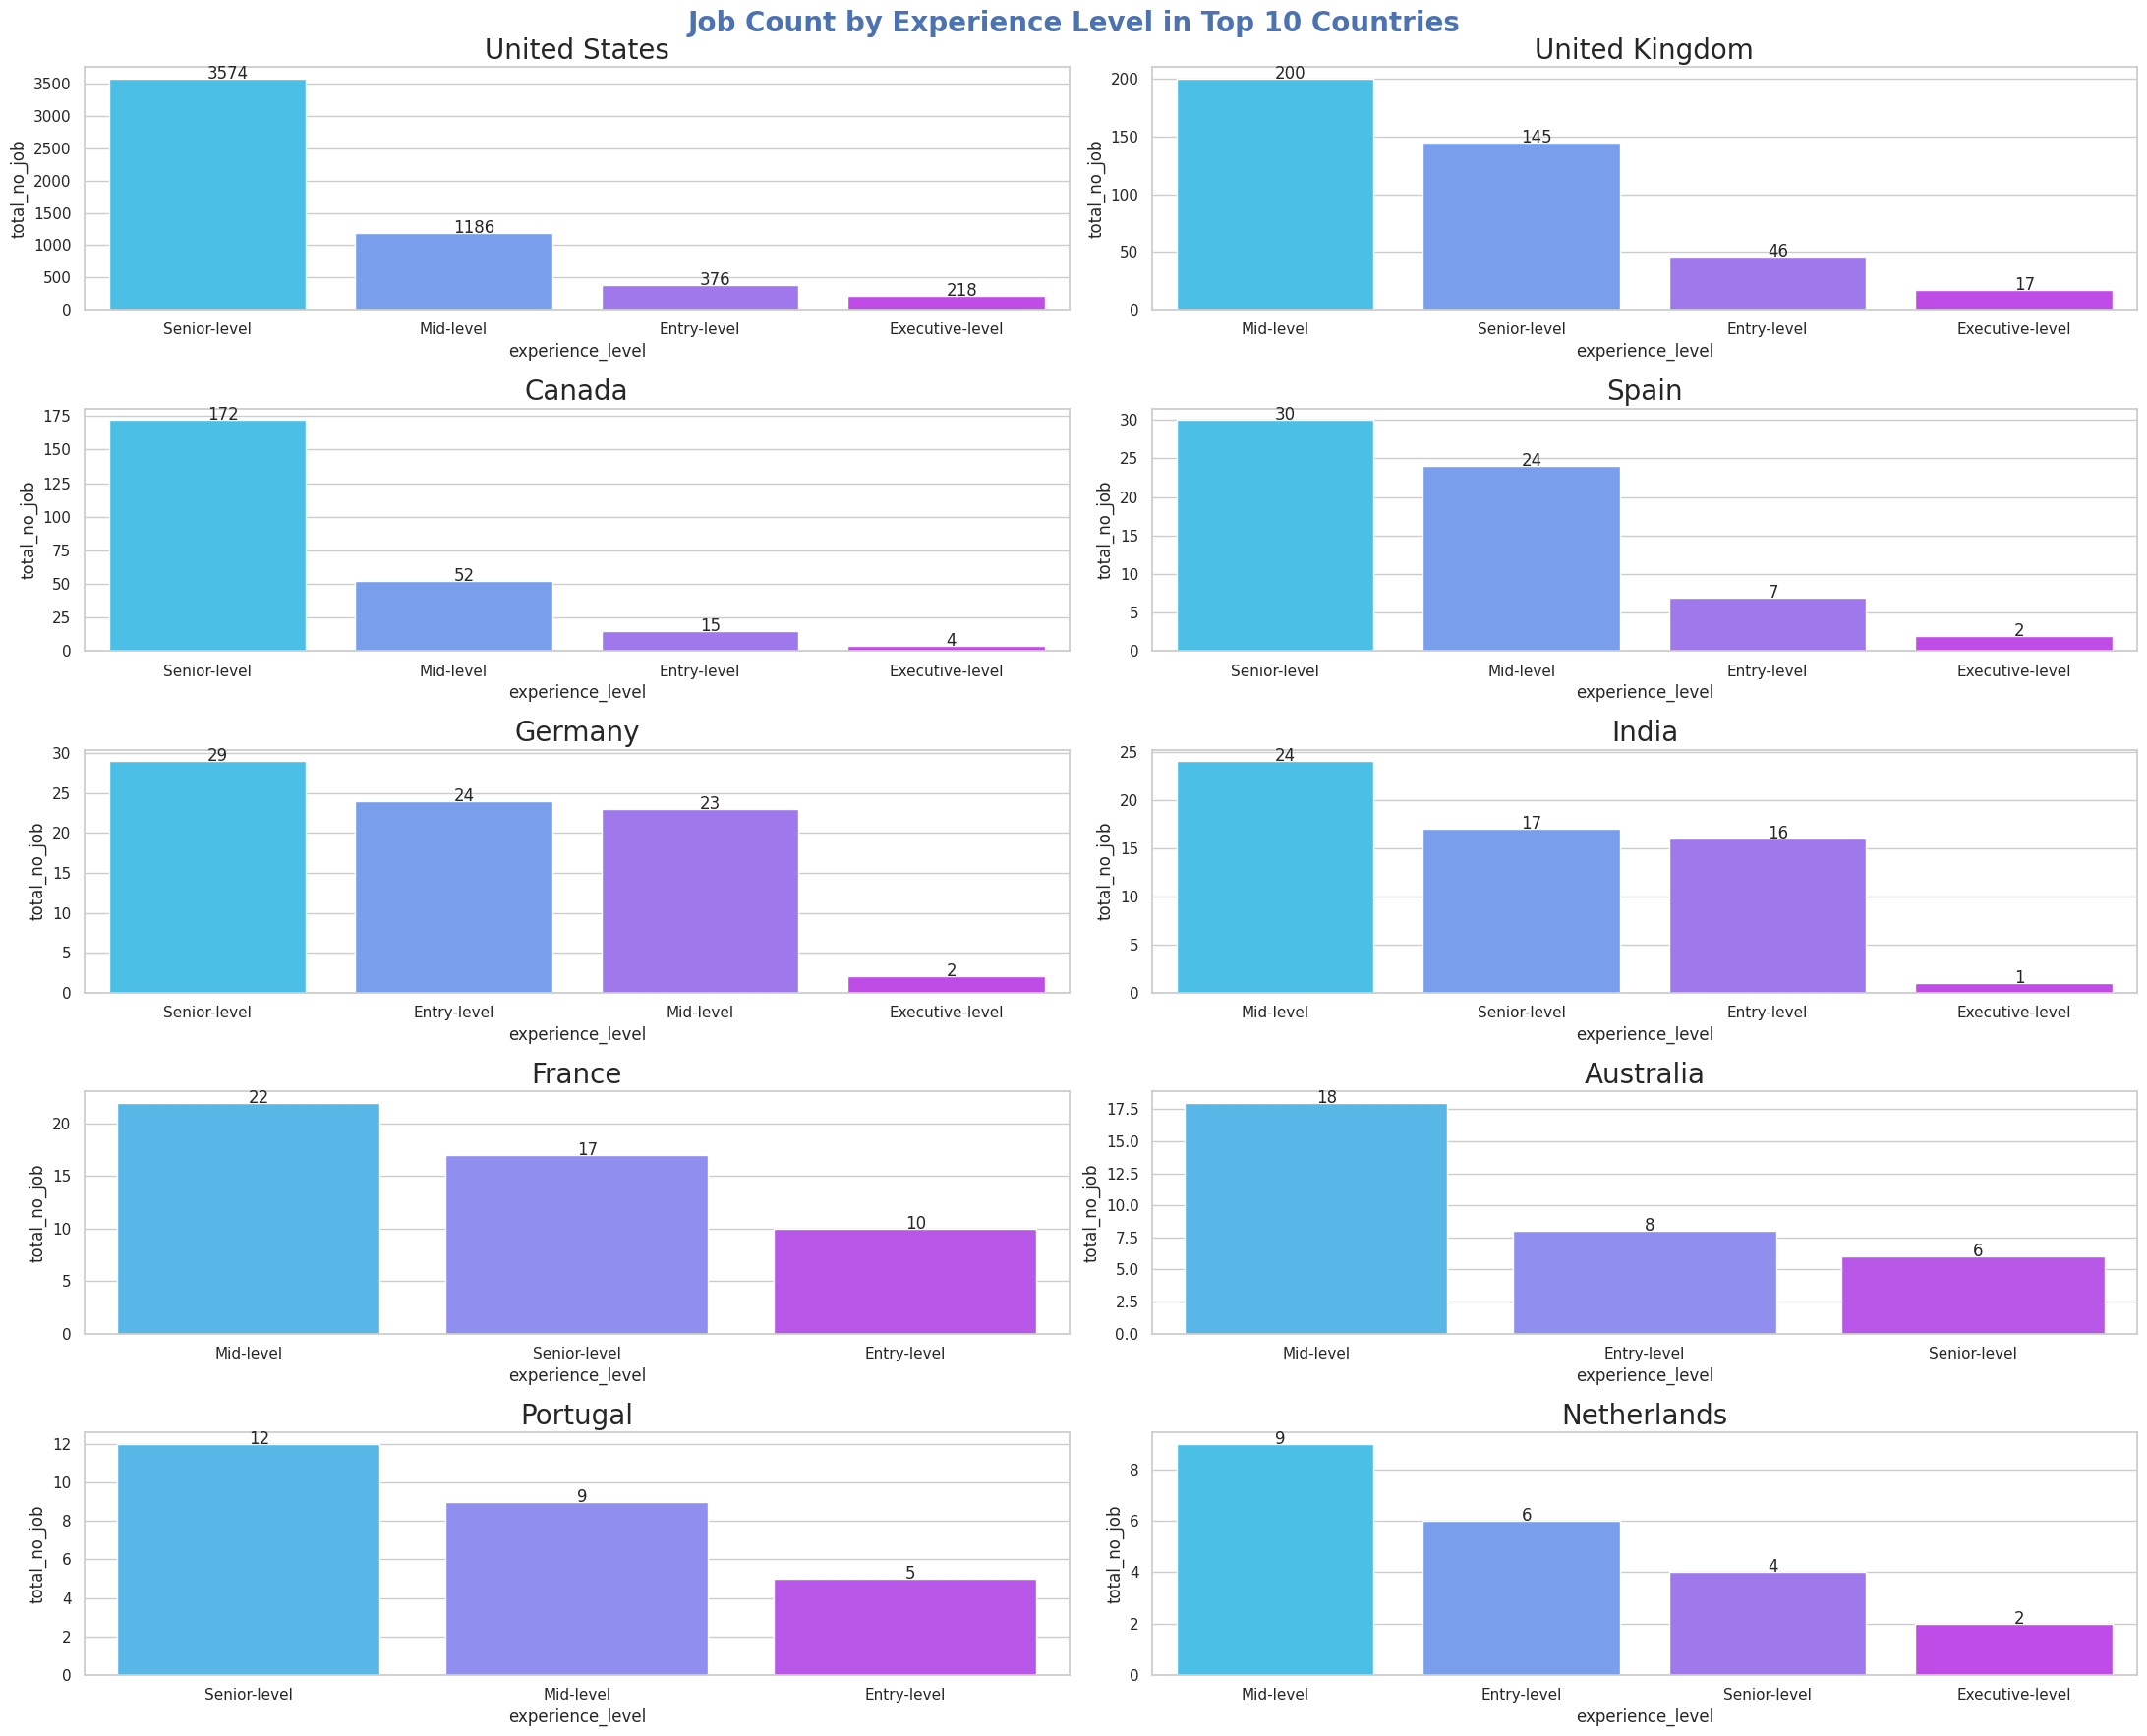

In [118]:
# visualisation
fig,axis = plt.subplots(5,2,figsize=(22,18))
axis = axis.flatten()




for index,country in enumerate(final_df['company_location'].unique()):
  country_data = final_df[final_df['company_location']==country]

  sns.barplot(data=country_data,x='experience_level',y='total_no_job',palette='cool',ax = axis[index])
  axis[index].set_title(f'{country}',fontsize=20)
  for i,row in enumerate(country_data['total_no_job']):
    axis[index].text(x=i,y=row,s=row)



plt.suptitle('Job Count by Experience Level in Top 10 Countries', fontsize=20, fontweight='bold',color='b')
# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.tight_layout()
plt.show()



Conclusion on Job Distribution by Experience Level and Company Location (2024)

- **United States**:
  - 🧠 **Senior-level roles**: 3,574 positions
  - ⚙️ **Mid-level roles**: 1,186 positions
  - 👶 **Entry-level roles**: 376 positions
  - 🧑‍💼 **Executive-level roles**: 218 positions
  - > 🇺🇸 The U.S. is clearly the leader in data-related job opportunities across all experience levels.

- **United Kingdom**:
  - ⚙️ Mid-level: 200
  - 🧠 Senior-level: 145
  - 👶 Entry-level: 46
  - 🧑‍💼 Executive-level: 17

- **Canada**:
  - 🧠 Senior-level: 172
  - ⚙️ Mid-level: 52
  - 👶 Entry-level: 15
  - 🧑‍💼 Executive-level: 4

- **Spain**:
  - 🧠 Senior-level: 30
  - ⚙️ Mid-level: 24
  - 👶 Entry-level: 7
  - 🧑‍💼 Executive-level: 2

- **Germany**:
  - 🧠 Senior-level: 29
  - ⚙️ Mid-level: 23
  - 👶 Entry-level: 24
  - 🧑‍💼 Executive-level: 2

- **India**:
  - ⚙️ Mid-level: 24
  - 🧠 Senior-level: 17
  - 👶 Entry-level: 16
  - 🧑‍💼 Executive-level: 1

- **France**:
  - ⚙️ Mid-level: 22
  - 🧠 Senior-level: 17
  - 👶 Entry-level: 10
  - 🧑‍💼 Executive-level: 0

- **Portugal**:
  - 🧠 Senior-level: 12
  - ⚙️ Mid-level: 9
  - 👶 Entry-level: 5
  - 🧑‍💼 Executive-level: 0

- **Netherlands**:
  - ⚙️ Mid-level: 9
  - 👶 Entry-level: 6
  - 🧠 Senior-level: 4
  - 🧑‍💼 Executive-level: 2

- **Australia**:
  - ⚙️ Mid-level: 18
  - 🧠 Senior-level: 6
  - 👶 Entry-level: 8
  - 🧑‍💼 Executive-level: 0

---

💡 Key Insight

> The **United States** is the central hub for data-related careers at all experience levels, particularly **senior** and **executive** positions. Other countries like the **United Kingdom** and **Canada** also have strong markets, while nations such as **Portugal**, **France**, and **India** offer more opportunities in **entry** and **mid-level** positions. This indicates both the **maturity** of the data science market and regional **demand for skilled professionals**.


#### Which job roles experienced the highest salary increase from 2023 to 2024

In [119]:
job_title_df = df[df['work_year'].isin([2023, 2024])].groupby(["work_year", "job_title"])["salary_in_usd"].mean().unstack().T
job_title_df["increase"] = (job_title_df[2024] - job_title_df[2023]).round(2)
job_title_df["percent_of_increase"] = (((job_title_df[2024] - job_title_df[2023]) / job_title_df[2023]) * 100).round(2)
max_df = job_title_df.sort_values("percent_of_increase", ascending=False).head(10)
final_df = max_df.reset_index()
final_df


work_year,job_title,2023,2024,increase,percent_of_increase
0,Research Analyst,94232.288462,146875.000000,52642.71,55.86
1,Machine Learning Scientist,197701.836735,282916.666667,85214.83,43.10
2,Data Product Manager,164350.000000,213150.000000,48800.00,29.69
3,Research Engineer,176599.380952,227896.782609,51297.40,29.05
4,Data Science Engineer,154705.692308,190000.000000,35294.31,22.81
5,Applied Scientist,188643.038462,222618.875000,33975.84,18.01
6,Research Scientist,185295.132911,207876.190476,22581.06,12.19
7,Data Visualization Specialist,115860.000000,127050.000000,11190.00,9.66
8,MLOps Engineer,131269.818182,142500.000000,11230.18,8.56
9,ML Engineer,207427.287356,222600.000000,15172.71,7.31


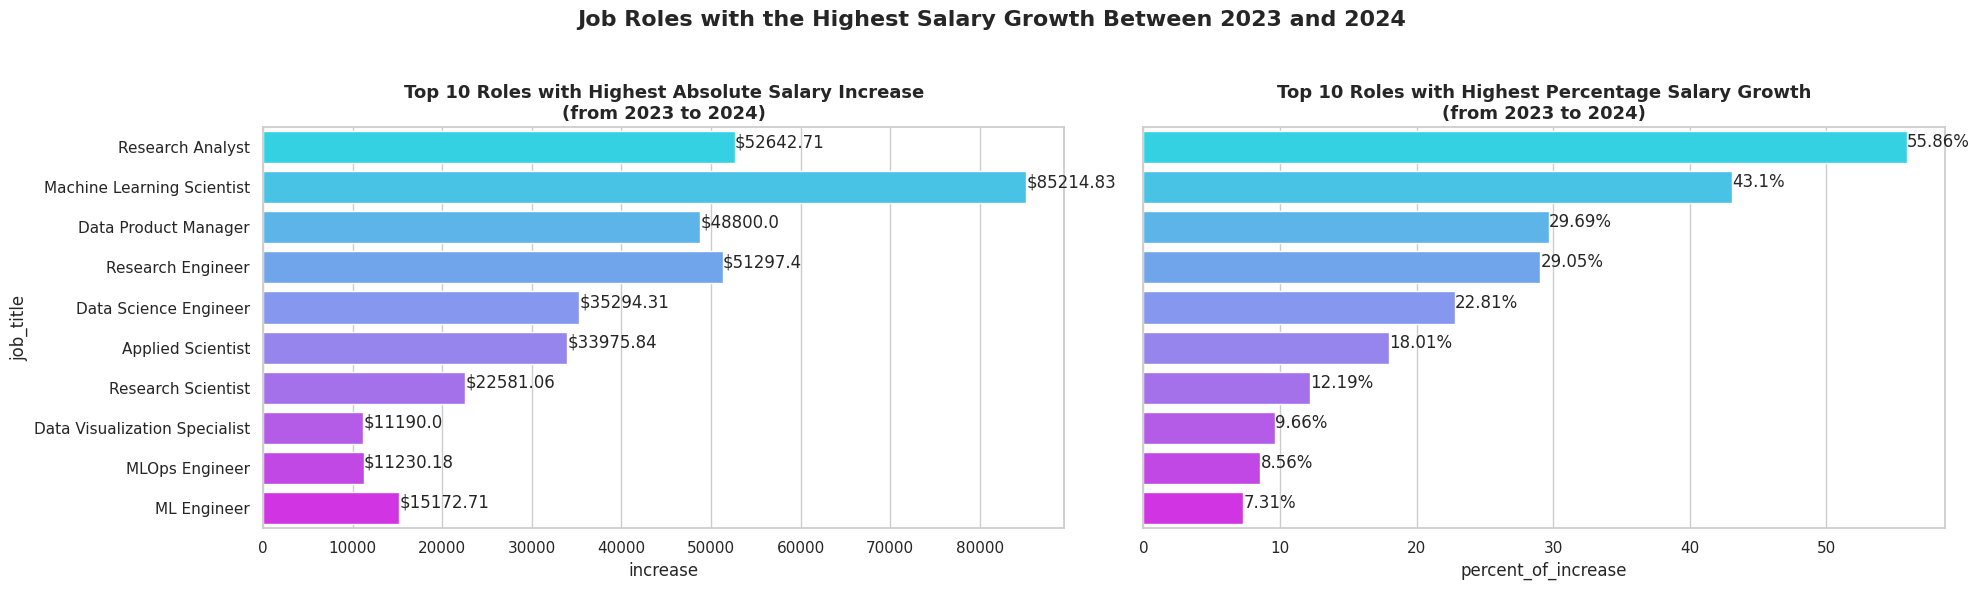

In [120]:
# visualisation
final_df


fig,axis=plt.subplots(1,2,figsize=(20,6),sharey=True)
axis = axis.flatten()


sns.barplot(data=final_df,y='job_title',x='increase',palette='cool',ax=axis[0])
for i,v in enumerate(final_df['increase']):
  axis[0].text(v,i,f'${v}')
axis[0].set_title('Top 10 Roles with Highest Absolute Salary Increase\n(from 2023 to 2024)', fontsize=13, fontweight='bold')


sns.barplot(data=final_df,y='job_title',x='percent_of_increase',palette='cool',ax=axis[1])
for i,v in enumerate(final_df['percent_of_increase']):
  axis[1].text(v,i,f'{v}%')
axis[1].set_title('Top 10 Roles with Highest Percentage Salary Growth\n(from 2023 to 2024)', fontsize=13, fontweight='bold')


plt.suptitle('Job Roles with the Highest Salary Growth Between 2023 and 2024', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

 Salary Growth Analysis (2023 vs. 2024)

This analysis highlights the job titles in the data industry that experienced the highest increase in average salary from 2023 to 2024.

 🔝 Top Gainers (Based on Percentage Increase):

1. **Research Analyst**
   - 💰 2023: $94,232 → 2024: $146,875
   - 📈 Increase: $52,642.71 (🔺 **55.86%**)
   - > This is the highest salary jump, suggesting a significant rise in demand for analytical research capabilities.

2. **Machine Learning Scientist**
   - 💰 2023: $197,701 → 2024: $282,917
   - 📈 Increase: $85,214.83 (🔺 **43.10%**)
   - > Consistent with growing investments in machine learning research and innovation.

3. **Data Product Manager**
   - 💰 2023: $164,350 → 2024: $213,150
   - 📈 Increase: $48,800 (🔺 **29.69%**)

4. **Research Engineer**
   - 💰 2023: $176,599 → 2024: $227,897
   - 📈 Increase: $51,297 (🔺 **29.05%**)

5. **Data Science Engineer**
   - 💰 2023: $154,706 → 2024: $190,000
   - 📈 Increase: $35,294 (🔺 **22.81%**)

 Modest Increases:

- **ML Engineer** and **MLOps Engineer** saw salary increases of only **7.31%** and **8.56%** respectively, possibly indicating stabilization in their market value.
- **Data Visualization Specialist** observed a **9.66%** increase, showing modest but steady growth.

---

💡 Key Insight

> The largest growth is seen in **research-focused** and **product-oriented** roles, highlighting the increasing industry value placed on **data-driven innovation**, **strategic insights**, and **machine learning advancements**. While roles like ML Engineer and MLOps Engineer continue to be high-paying, their slower growth suggests market maturity in these areas.


#### Which experience level has the widest salary range?

In [121]:


full_df = df.pivot_table(index='company_location',columns='experience_level',values='salary_in_usd',fill_value=0).reset_index()
full_df.update(full_df.select_dtypes(include='number').round(2))

# high average paying country for Entry-level job
full_df.sort_values(by='Entry-level',ascending=False).head(10)[['company_location','Entry-level']]

experience_level,company_location,Entry-level
8,Bosnia and Herzegovina,120000.00
66,Sweden,105000.00
73,United States,100539.51
33,Iraq,100000.00
13,China,100000.00
45,Mauritius,100000.00
32,Iran,100000.00
0,Algeria,100000.00
10,Canada,78004.13
67,Switzerland,76880.00


In [122]:
# high average paying country for Executive-level job
full_df.sort_values(by='Executive-level',ascending=False).head(10)[['company_location','Executive-level']]

experience_level,company_location,Executive-level
73,United States,198028.57
72,United Kingdom,169206.47
54,Poland,153667.00
59,Russia,140333.33
23,Germany,135936.00
9,Brazil,112500.00
10,Canada,112058.75
48,Netherlands,107887.00
51,Norway,100416.00
30,India,76309.00


In [123]:
# # high average paying country for Mid-level job
full_df.sort_values(by='Mid-level',ascending=False).head(10)[['company_location','Mid-level']]

experience_level,company_location,Mid-level
57,Qatar,300000.00
73,United States,135024.49
60,Saudi Arabia,134999.00
4,Australia,129840.94
35,Israel,119059.00
71,United Arab Emirates,115000.00
10,Canada,112644.48
67,Switzerland,112549.50
41,Lithuania,94812.00
34,Ireland,93147.75


In [124]:
# # high average paying country for Senior-level job
full_df.sort_values(by='Senior-level',ascending=False).head(10)[['company_location','Senior-level']]

experience_level,company_location,Senior-level
35,Israel,266468.50
37,Japan,196000.00
73,United States,167839.18
56,Puerto Rico,167500.00
10,Canada,154090.40
19,Egypt,152650.00
49,New Zealand,151634.33
23,Germany,137926.21
4,Australia,136324.17
70,Ukraine,135600.00


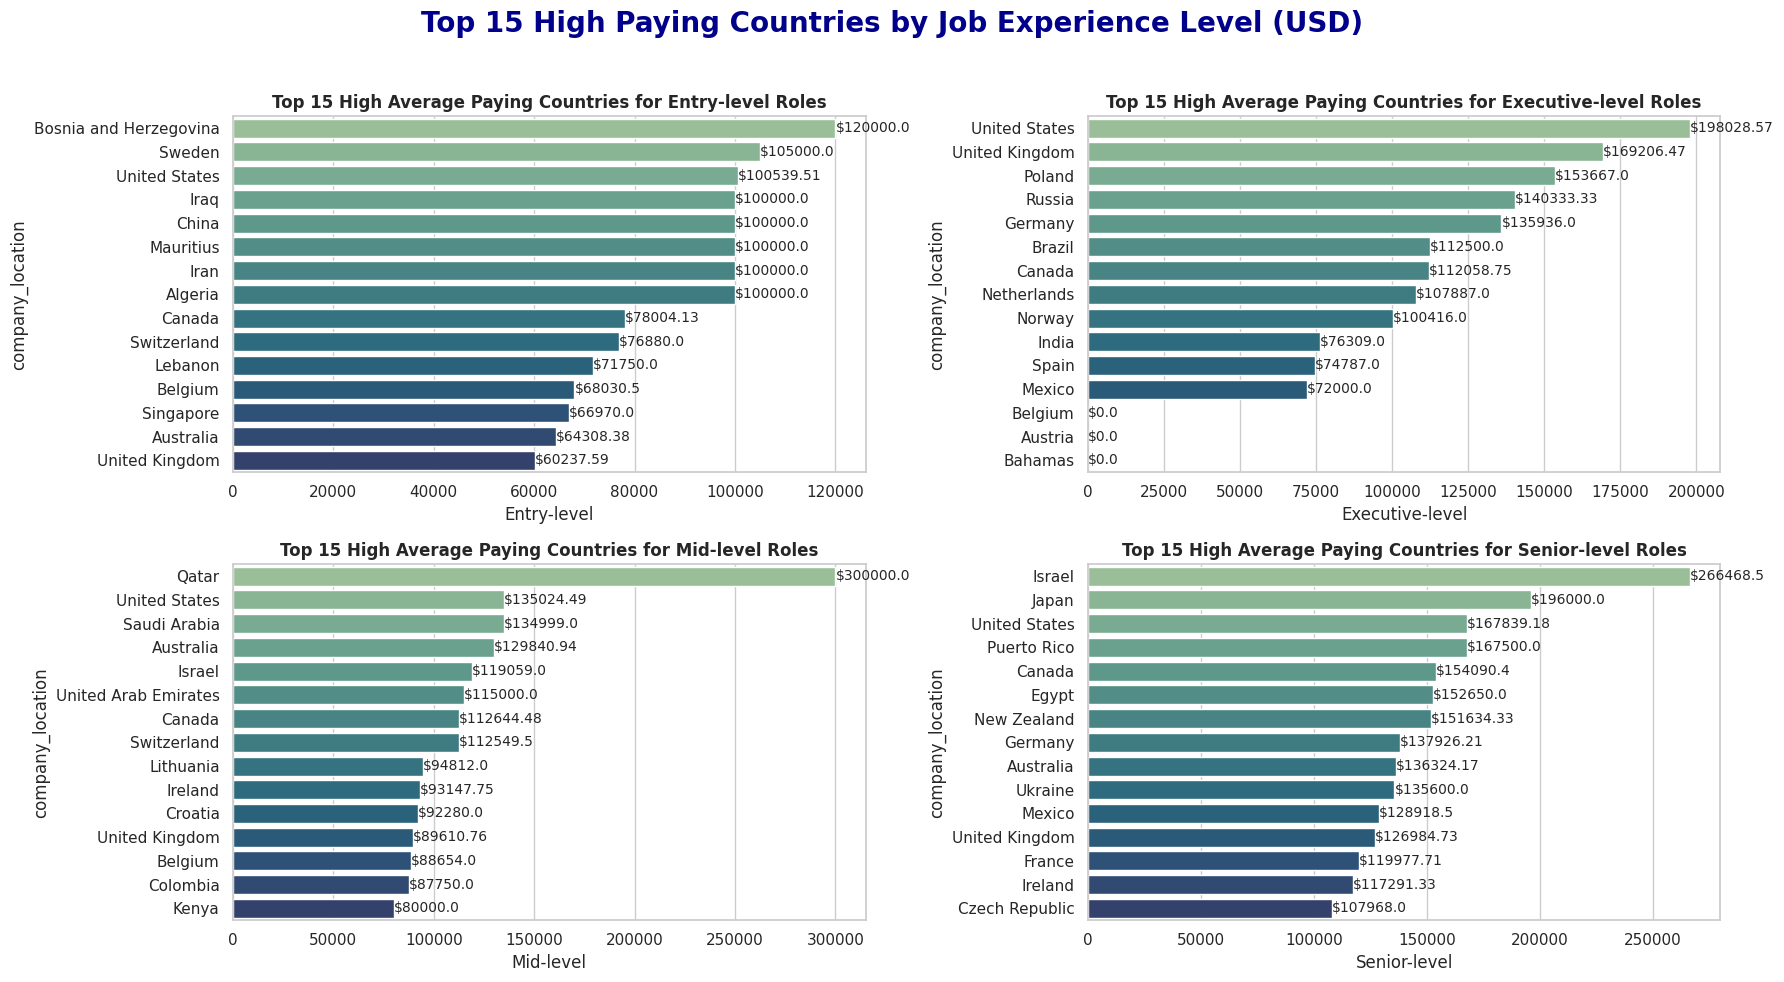

In [125]:


full_df = df.pivot_table(index='company_location',columns='experience_level',values='salary_in_usd',fill_value=0).reset_index()
full_df.update(full_df.select_dtypes(include='number').round(2))

level = full_df.select_dtypes(include='number').columns.to_list()
titles = [
    'Top 15 High Average Paying Countries for Entry-level Roles',
    'Top 15 High Average Paying Countries for Executive-level Roles',
    'Top 15 High Average Paying Countries for Mid-level Roles',
    'Top 15 High Average Paying Countries for Senior-level Roles']

fig,axis = plt.subplots(2,2,figsize=(18,10))
axis = axis.flatten()

for i,level in enumerate(level):
  top_countries = full_df.sort_values(by=level,ascending=False).head(15)

  sns.barplot(
              data=top_countries,
              x=level,
              y='company_location',
              palette='crest',
              ax=axis[i])
  axis[i].set_title(titles[i],fontweight='bold')

  for index,value in enumerate(top_countries[level]):
    axis[i].text(value,index,f'${value}',va='center',fontsize=10)

plt.suptitle('Top 15 High Paying Countries by Job Experience Level (USD)', fontweight='bold', color='darkblue', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


 🌐 Insights on Highest Paying Countries for Data Science Roles by Experience Level

An in-depth analysis of salary data for various experience levels across different countries reveals some fascinating trends in global compensation for data professionals.

---

 Entry-Level Positions

For entry-level roles, **Bosnia and Herzegovina** surprisingly takes the lead with an average salary of **$120,000**, followed by **Sweden** at **$105,000**. The **United States** holds a strong position at third with **$100,539**, while other countries such as **Iraq**, **China**, **Iran**, and **Mauritius** also report unusually high salaries of **$100,000**. This may reflect specialized hiring, expat incentives, or data anomalies.

**Key Takeaway**: Despite being early in their careers, data professionals in select regions are securing high compensation, likely due to niche demands or limited talent pools.

---

 👑 Executive-Level Positions

Unsurprisingly, the **United States** tops the chart for executive-level roles, offering nearly **$198,000** on average. **The United Kingdom**, **Poland**, and **Russia** follow, showcasing strong leadership roles in mature markets. **Germany**, **Brazil**, and **Canada** also provide six-figure salaries to experienced executives.

**Key Takeaway**: Mature tech economies and innovation-driven regions continue to dominate in rewarding top leadership roles, particularly in North America and Europe.

---
 Mid-Level Roles

In a stunning highlight, **Qatar** leads mid-level salary averages with a whopping **$300,000**, which is significantly higher than any other country. This figure likely represents unique high-stakes roles in government-backed or foreign-funded projects. The **United States**, **Saudi Arabia**, **Australia**, and **Israel** also demonstrate strong pay at this level.

**Key Takeaway**: The Middle East is becoming a hotspot for lucrative mid-level roles, possibly due to strategic investments in AI and data infrastructure.

---

 Senior-Level Roles

For senior roles, **Israel** takes the crown with an average of over **$266,000**, reflecting its deep investment in data-driven innovation and cybersecurity. **Japan** and the **United States** follow, while **Puerto Rico**, **Canada**, and **Germany** round out the top high-paying regions.

**Key Takeaway**: Countries with strong R&D ecosystems and tech innovation consistently lead in rewarding experienced professionals.

---

  Final Summary

- The **United States** remains the most consistent high-paying country across all roles.
- Emerging markets such as **Qatar**, **Bosnia**, and **Israel** offer surprisingly high salaries in specific tiers.
- Executive and senior-level roles are most lucrative in Western nations, while mid-level roles see disruption from the Middle East.
- Entry-level salaries are inconsistent globally, with some countries offering unexpectedly high pay—possibly due to specific projects, industries, or talent shortages.

💼 These insights are crucial for HR professionals and job seekers alike to understand global compensation trends and identify potential relocation or recruitment strategies.


#### Identify roles 2024 where remote jobs pay more than in-office.

In [126]:

temp_df = df[df['work_year']==2024].pivot_table(index='job_title',columns='work_models',values='salary_in_usd',fill_value=0).reset_index()
temp_df[temp_df['Remote'] > temp_df['On-site']][['job_title']]


work_models,job_title
1,AI Engineer
2,Analytics Engineer
9,Data Analyst
12,Data Developer
18,Data Science
20,Data Science Engineer
21,Data Science Manager
30,Machine Learning Engineer


🌍 Remote Roles Outearn Office Positions in 2024

The salary landscape in 2024 shows a remarkable shift—**remote jobs are now paying more than in-office roles across several high-demand data and AI positions**.

This trend highlights how companies are increasingly willing to invest in talent regardless of location. As long as the output is exceptional, the workplace can be anywhere—from a quiet mountain cabin to a bustling co-working space overseas.

💡 Key Insights

- Remote roles are now **financially more attractive** than on-site roles in several specialized areas of data science and AI.
- The compensation gap in favor of remote work suggests that **remote efficiency, global hiring, and work-life balance** are driving forces behind this shift.
- This reflects a broader transformation in work culture—**flexibility is no longer a perk, it's part of the value proposition.**

🔍 Final Thought

For professionals in tech and data, this shift reinforces one truth: **location is becoming irrelevant—skills are not**. Remote work isn’t just a lifestyle choice anymore; it’s a career advantage.


#### Which job title has the widest salary range (max - min)


In [127]:
df_top_range = df.groupby("job_title")["salary_in_usd"].agg(lambda x: x.max() - x.min()).sort_values(ascending=False).reset_index().head(10)
df_top_range

,job_title,salary_in_usd
0,Data Scientist,734000
1,Data Engineer,732975
2,Machine Learning Engineer,730000
3,Machine Learning Scientist,727200
4,Research Engineer,703545
5,Research Scientist,697000
6,Analytics Engineer,662427
7,Data Analyst,415967
8,AI Scientist,399884
9,Applied Scientist,394000


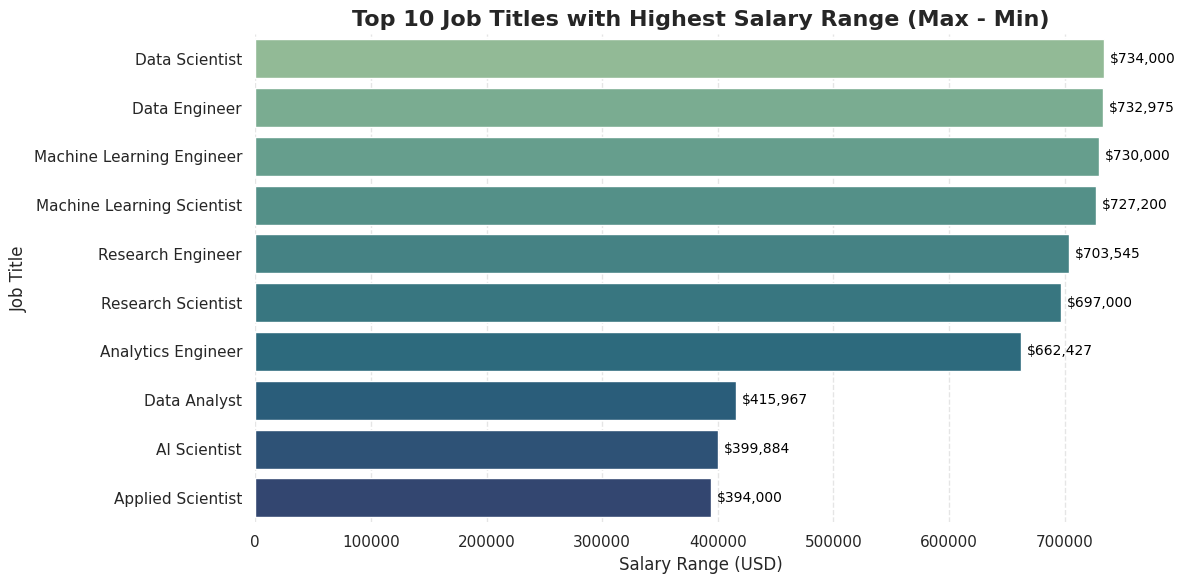

In [128]:



# Plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=df_top_range,
    x='salary_in_usd',
    y='job_title',
    palette='crest'
)

# Title and labels
plt.title('Top 10 Job Titles with Highest Salary Range (Max - Min)', fontsize=16, fontweight='bold')
plt.xlabel('Salary Range (USD)', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Annotate each bar
for i, v in enumerate(df_top_range['salary_in_usd']):
    plt.text(v + 5000, i, f"${v:,}", color='black', va='center', fontsize=10)

# Style
sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 Widest Salary Range in 2024

Among top-paying roles in 2024, **Data Scientist** had the **widest salary range**, reaching a maximum of **$734,000 USD**.

This wide range suggests significant variability in how the role is compensated, likely driven by factors such as:

- Industry (e.g., tech vs healthcare)
- Location and cost of living
- Experience level
- Company size and funding stage



#### Identify countries with remote salary above global average.

In [129]:
global_avg = df["salary_in_usd"].mean()
temp_df = df[df["work_models"] == "Remote"].groupby("company_location")["salary_in_usd"].mean()
temp_df_above = temp_df[temp_df > global_avg]
temp_df_above= temp_df_above.reset_index()
temp_df_above['salary_in_usd']= temp_df_above['salary_in_usd'].round(2)
temp_df_above

,company_location,salary_in_usd
0,Puerto Rico,167500.00
1,Qatar,300000.00
2,Ukraine,170000.00
3,United States,153189.96


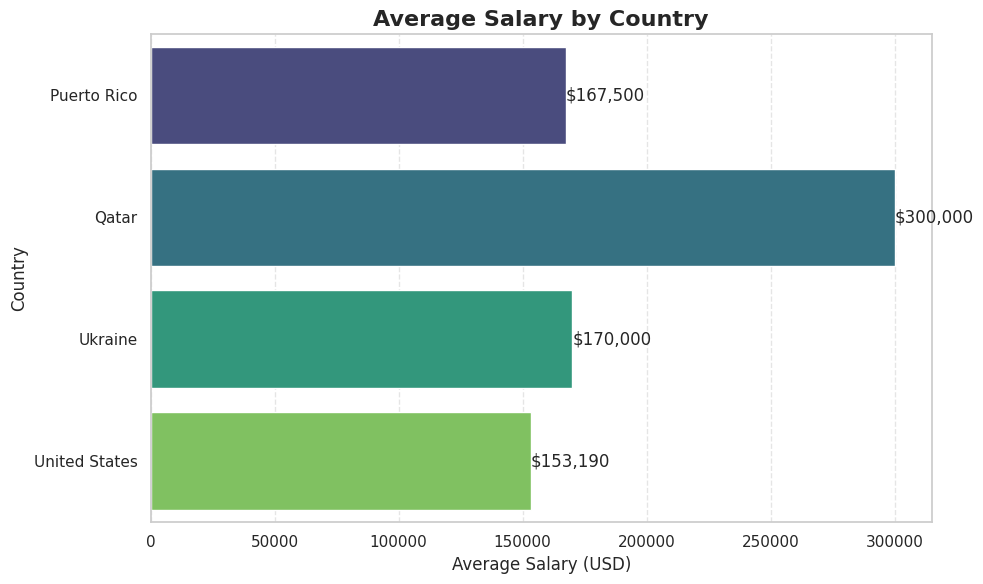

In [130]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=temp_df_above,
    y='company_location',
    x='salary_in_usd',
    palette='viridis'
)

# Add annotations
for index, row in enumerate(temp_df_above['salary_in_usd']):
    plt.text(row, index, f"${row:,.0f}", va='center')

# Titles and labels
plt.title('Average Salary by Country', fontsize=16, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Conclusion**

# 📊 Final Conclusion: Data Science Salary Trends in 2024

## 🌍 Global Compensation Landscape

The 2024 data science job market revealed **sharp salary variations** across roles, experience levels, work models, and geographical regions. These patterns underscore a growing maturity and segmentation in the data-driven economy.

---

## 💼 By Job Title

- **Highest Paid Roles:** Positions such as *Machine Learning Scientist*, *Research Engineer*, and *AI Architect* topped the salary charts, with some reaching above **$750,000**.
- **Lowest Paid Roles:** Entry-level roles like *Data Science* and *ETL Developer* reported minimum salaries as low as **$16,666**, emphasizing the need for skill growth and specialization.
- **Widest Salary Range:** *Data Scientist* showed the **greatest salary spread**, indicating variable pay across industries, companies, and countries.

---

## 📈 Year-over-Year Growth

Roles such as *Research Analyst*, *Machine Learning Scientist*, and *Data Product Manager* saw **over 25–55% salary increases** from 2023 to 2024. This reflects:
- Rising demand for advanced AI/ML talent
- Competitive pressure across sectors to retain data-driven leaders

---

## 🏢 By Company Size

- **Large Companies** consistently offered **higher mean salaries** over time, particularly in 2024.
- **Small Companies** reported a drop in average salaries in 2024, possibly due to economic constraints or shifting hiring strategies.

---

## 🌐 By Location

- **United States, Switzerland, and Israel** were top payers across most experience levels.
- Countries like **Bosnia & Herzegovina and Sweden** surprisingly offered high entry-level pay.
- **India, Portugal, and France** offered modest compensation for senior roles, reflecting market maturity and local demand.

---

## 🧑‍💼 By Experience Level

- **Executive-level** roles had the highest global pay, with the U.S. averaging nearly **$198K**.
- **Mid-level** professionals saw dramatic boosts in regions like *Qatar* and *Saudi Arabia*.
- **Entry-level** roles paid best in select emerging markets, hinting at niche talent shortages.

---

## 🏠 Remote vs On-Site

Several roles—including *AI Engineer*, *Data Scientist*, and *Machine Learning Engineer*—earned **higher average salaries when working remotely**, emphasizing:
- The premium companies are willing to pay for distributed AI/ML talent
- A potential shift in long-term work culture favoring remote expertise

---

